# 3802ICT Assignment 1

<p style="text-align:right">Junghee Yang (Kat) <br>
Regnier Avice<br>
Yunpeng Huang (Steven)</p>

## Project title:

## ● A brief description of the problem/question
<p>Amsterdam is the capital city of Netherland with a population of 870,000 with 17 million tourists every year. Many tourists these days are staying at Airbnb hosted by homeowners. This dataset is from insiderairbnb.com which contains descriptions of Airbnb listings on 6th of December 2018 in Amsterdam. The dataset includes the name of the listing, number of reviews, locations, etc. </p>

<p>This projects are consist of these problems/questions:</p>
 

<ul>
    <li><b>Classification and label prediction -</b> Can prices be predicted as expensive and non-expensive by the size of property, reviews and location?</li>
    <li><b>Association and Correlation - </b></li>
    <li><b>Clustering </b> - Do patterns in listening attributes correspond with the geographical location of the listenings?</li>
</ul>

## ● Dataset description
<p>The dataset contains Airbnb listings in Amsterdam on 6th December 2018 and it was retrieved from Kaggle which was downloaded from insideairbnb.com. It contains details of Airbnb listings such as prices, reviews, size of the place, etc. with 96 attributes with 20,030 data samples. </p>

## ● Algorithms/techniques for different learning tasks

### - Classification and label prediction
<b>Binary Classification using K-Nearest Neighbours</b>: Binary classification is one of the  Supervised Learning methods. It is classifying the elements to one or the other by measuring a series of attributes. 

K-nearest neighbours (KNN) algorithm is a type of supervised ML algorithm which can be used for both classifications as well as predictive regression problems. K-nearest neighbours (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. <p style="font-size:60%;">KNN Algorithm - Finding Nearest Neighbors - Tutorialspoint. https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm<p>

### - Association and Correlation
<b>FP-growth Algorithm:</b> Frequent pattern growth algorithm (FP-growth algorithm) uses Depth-first-search that follows the idea of divide-and-conquer strategy. It first compresses the databasse into frequent pattern tree that still retains the itemset association information (node:item, support_count, branch:association with support_count), once the tree is constructed it will be divided into a set of conditional databases, each associated with one frequent item and then from the associated frequent item it can be feature examined.

### - Clustering
<b>K-Means (Lloyd’s Algorithm):</b> K-Means clustering is based on the idea to generate k clusters and assign each point to the cluster with the nearest mean-point. The optimal approach is NP-Hard with exponential time complexity. The Lloyd’s Algorithm is a heuristic approach to approximate the optimal result which in practice should run in linear time complexity <font color="red">reference</font>.

## ● Measurements to evaluate the results

### - Linear Regression
#### Mean squared error

Mean squared error is the average squared differene between the estiation and the reuslts. It is always positive value and the closer to zero, more accurate the estimation. MSE is computed as

$
{\large
\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{align}
}%
$

, where TP = True Positive, TN = True Negatives, FP = False Positive, and FN = False Negatives. 

### - Association and Correlation
Association rule
$
{\begin{align}
(A\longrightarrow B)
\end{align}
}%
$

• Min_sup: minimum support threshold
• Min_conf: minimum confidence threshold

$
{\large
 \begin{array}{l}
supp( A\Longrightarrow B) =P( A\cup B) =\frac{( Transcation\ containing\ \boldsymbol{both} \ A,B)}{( Total\ No\ of\ transactions)}\\
confidence( A\Longrightarrow B) =P( B|A) =\frac{support\_count( A\cup B)}{support\_count( A)}\\
lift( A,B) =\frac{P( A\cup B)}{P( A) P( B)}
\end{array}
}%
$

support is a measurement of the frequency which an itemset occurs in all transactions, its value will be compared with the min_sup. Range[0,1]

confidence is a measurement of how often items in B occurs in transaction that contains X, its value will be compared with min_conf. Range[0,1]

Lift is a measurement of correlation, which state that A is independent of B if ${
\begin{align}
 P( A\cup B) =P(A)P(B)
\end{align}
}%
$ otherwise, A and B are depedent and correlated. Range[0,inf]

### - Clustering

To evaluate the effectiveness of clusters the Intracluster and Intercluster distance is measured. Effective clustering minimizes the Intracluster distance while maximizing the Intercluster distance.

For this project two popular methods are used. The Dunn Index and the Silhouette analysis.

#### Dunn Index

The goal is to maximize the value of the Dunn Index. A high Dunn Index indicates large inter cluster distance and low intra cluster distance. 

$
{\large
\begin{align}
DunnIndex = \frac{min(d(InterCluster))}{max (d(IntraCluster))} 
\end{align}
}%
$


where the inter cluster distance is the maximum distance between two points of two clusters

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{b_j})
\end{align}
}%
$


and the intra cluster distance is maximum distance between two points of the same cluster

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{a_j})
\end{align}
}%
$

#### Silhouette analysis

For each point the silhouette value will be caluclated which can have the range of [-1,1]. The goal is to maximize the silhouette value. Many negative values are an indication for to many or to few clusters. This value will be used to determine the right size of $k$.

$
{\large
\begin{align}
\Delta s(i) = \frac{b(i)-a(i)}{max (a(i),b(i)}
\end{align}
}%
$

where $a(i)$ is the mean distance of the point $i$ to other points of the same cluster

$
{\large
\begin{align}
\Delta a(i) = \frac{\Sigma  d(i,j)}{|C_i| -1}
\end{align}
}%
$

and $b(i)$ is the minimum (In case of more than two clusters the smallest mean is taken) mean distance of the point $i$ to other points of the other cluster. 
$
{\large
\begin{align}
\Delta b(i) = min(\frac{\Sigma  d(i,j)}{|C_k|}) \hspace{1cm}for \hspace{0.5cm} k \neq i
\end{align}
}%
$

## Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
import math
from scipy import stats
from scipy.stats import norm

#interactive map
import folium
from folium.plugins import HeatMap

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/home/steven/Insync/hsteven95@gmail.com/Google Drive/A_UNI/3804ICT Data Mining/assignment/airbnb_dataset/listings_details.csv')

/home/steven/anaconda3/envs/data/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("The dataset has {} rows and {} columns.".format(*df.shape))
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 20030 rows and 96 columns.
It contains 0 duplicates.


## original dataframe

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
columns_to_keep = ['id', 'host_is_superhost', 'description', 'latitude', 'longitude', 'host_identity_verified',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'price', 'amenities', 'square_feet', 'security_deposit', 
                   'minimum_nights', 'instant_bookable', 'availability_365', 'weekly_price', 
                   'monthly_price', 'zipcode','number_of_reviews', 'review_scores_rating']

df_mod = df[columns_to_keep].set_index('id')
print("The dataset has {} rows and {} columns - after dropping irrelevant columns.".format(*df_mod.shape))

The dataset has 20030 rows and 23 columns - after dropping irrelevant columns.


## Dataframe modified

In [7]:
df_mod[['price', 'weekly_price', 'monthly_price', 'security_deposit']].head(3)

,price,weekly_price,monthly_price,security_deposit
id,,,,
2818,$59.00,NaN,"$1,500.00",$100.00
3209,$160.00,$543.00,"$2,000.00",$300.00
20168,$80.00,NaN,NaN,NaN


In [8]:
#can be left as null: description, square_feet, drop no zip_code
df_mod.isna().sum()

host_is_superhost             4
description                 124
latitude                      0
longitude                     0
host_identity_verified        4
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    10
bedrooms                      8
beds                          7
price                         0
amenities                     0
square_feet               19624
security_deposit           6166
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price              17187
monthly_price             18469
zipcode                     866
number_of_reviews             0
review_scores_rating       2639
dtype: int64

In [9]:
def dollar_to_float(df):
    df = df.replace('[\$,]', '', regex=True).astype(float)
    return df


def obj_to_bool(df):
    df = df.replace('f', 'FALSE', regex=True).astype(bool)
    df = df.replace('t', 'TRUE', regex=True).astype(bool)
    return df


def percent_to_float(df):
    df = df.replace('%', '', regex=True).astype(float)
    return df


df_mod.price = dollar_to_float(df_mod.price)
df_mod.security_deposit = dollar_to_float(df_mod.security_deposit)
df_mod.weekly_price = dollar_to_float(df_mod.weekly_price)
df_mod.monthly_price = dollar_to_float(df_mod.monthly_price)
df_mod.security_deposit = dollar_to_float(df_mod.security_deposit)

df_mod.host_is_superhost = obj_to_bool(df_mod.host_is_superhost)
df_mod.host_identity_verified = obj_to_bool(df_mod.host_identity_verified)

df_mod.head()

,host_is_superhost,description,latitude,longitude,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,security_deposit,minimum_nights,instant_bookable,availability_365,weekly_price,monthly_price,zipcode,number_of_reviews,review_scores_rating
id,,,,,,,,,,,,,,,,,,,,,
2818,True,Quiet Garden View Room & Super Fast WiFi I'm r...,52.365755,4.941419,True,Apartment,Private room,2,1.5,1.0,...,NaN,100.0,3,t,44,NaN,1500.0,NaN,248,97.0
3209,True,You will love our spacious (90 m2) bright apar...,52.390225,4.873924,True,Apartment,Entire home/apt,5,1.0,2.0,...,NaN,300.0,4,f,47,543.0,2000.0,1013 XE,42,96.0
20168,True,"Cozy studio on your own private floor, 100% in...",52.365087,4.893541,True,Townhouse,Entire home/apt,2,1.0,1.0,...,NaN,NaN,1,f,198,NaN,NaN,1017,233,87.0
25428,True,"This nicely furnished, newly renovated apt is...",52.373114,4.883668,True,Apartment,Entire home/apt,3,1.0,1.0,...,NaN,300.0,14,f,141,650.0,2000.0,1016,1,100.0
27886,True,Stylish and romantic houseboat on fantastic hi...,52.386727,4.892078,True,Houseboat,Private room,2,1.0,1.0,...,NaN,0.0,2,t,199,810.0,2500.0,1013,171,99.0


In [10]:
df_mod['security_deposit'].fillna(0, inplace=True)

In [11]:
#Standard weekly price is 7*price
df_mod['weekly_price'].fillna(df_mod['price']*7, inplace=True)

#Standard monthly price is 30*price
df_mod['monthly_price'].fillna(df_mod['price']*30, inplace=True)

In [12]:
df_snapshot = df_mod

In [13]:
df_mod = df_mod.loc[df_mod['price'] > 0]

In [14]:
df_mod.dropna(subset=['beds', 'bedrooms', 'bathrooms', 'zipcode', 'review_scores_rating'], inplace=True)

/home/steven/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_mod['z_score'] = np.abs(stats.zscore(df_mod['price']))
df_mod = df_mod[df_mod.z_score < 3]

/home/steven/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_mod.head()

,host_is_superhost,description,latitude,longitude,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,...,security_deposit,minimum_nights,instant_bookable,availability_365,weekly_price,monthly_price,zipcode,number_of_reviews,review_scores_rating,z_score
id,,,,,,,,,,,,,,,,,,,,,
3209,True,You will love our spacious (90 m2) bright apar...,52.390225,4.873924,True,Apartment,Entire home/apt,5,1.0,2.0,...,300.0,4,f,47,543.0,2000.0,1013 XE,42,96.0,0.097545
20168,True,"Cozy studio on your own private floor, 100% in...",52.365087,4.893541,True,Townhouse,Entire home/apt,2,1.0,1.0,...,0.0,1,f,198,560.0,2400.0,1017,233,87.0,0.555060
25428,True,"This nicely furnished, newly renovated apt is...",52.373114,4.883668,True,Apartment,Entire home/apt,3,1.0,1.0,...,300.0,14,f,141,650.0,2000.0,1016,1,100.0,0.187970
27886,True,Stylish and romantic houseboat on fantastic hi...,52.386727,4.892078,True,Houseboat,Private room,2,1.0,1.0,...,0.0,2,t,199,810.0,2500.0,1013,171,99.0,0.015969
28658,True,2 beds guest room in Amsterdam West near Erasm...,52.375342,4.857289,True,Apartment,Private room,2,1.0,1.0,...,150.0,3,f,295,455.0,1950.0,1056,434,93.0,0.677423


In [17]:
df_mod.isna().sum()

host_is_superhost             0
description                  69
latitude                      0
longitude                     0
host_identity_verified        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     0
bedrooms                      0
beds                          0
price                         0
amenities                     0
square_feet               16195
security_deposit              0
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price                  0
monthly_price                 0
zipcode                       0
number_of_reviews             0
review_scores_rating          0
z_score                       0
dtype: int64

## Visualisation distribution plot

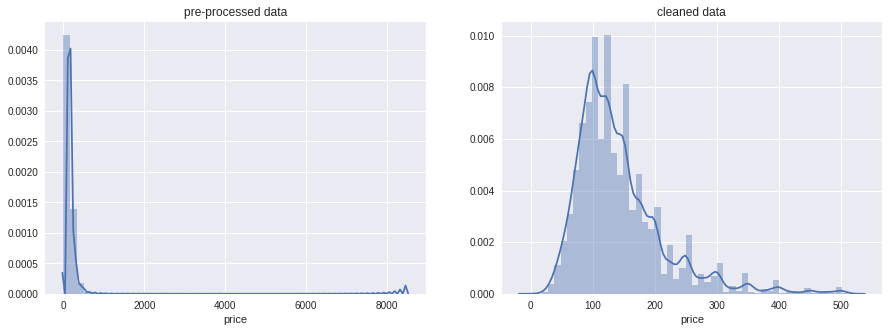

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['price'], ax=ax2)

plt.show()

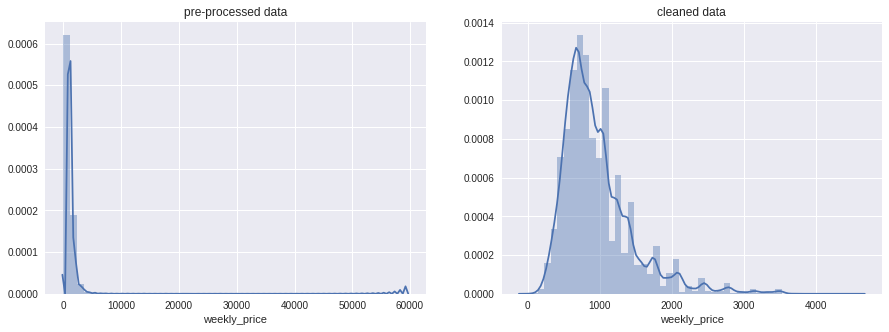

In [20]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['weekly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['weekly_price'], ax=ax2)

plt.show()

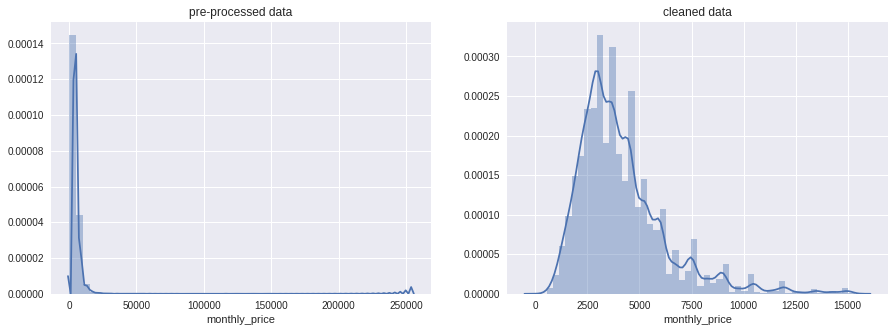

In [21]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['monthly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['monthly_price'], ax=ax2)

plt.show()

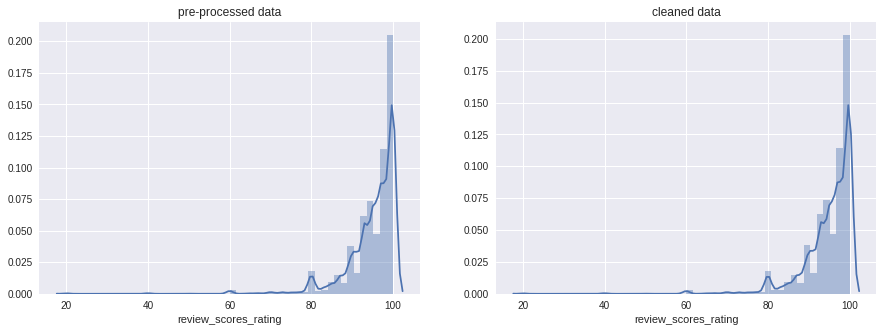

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['review_scores_rating'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['review_scores_rating'], ax=ax2)

plt.show()

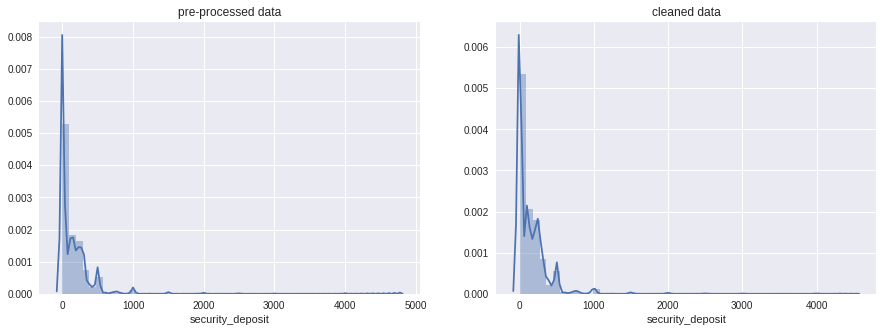

In [23]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['security_deposit'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['security_deposit'], ax=ax2)

plt.show()

## Boxplot

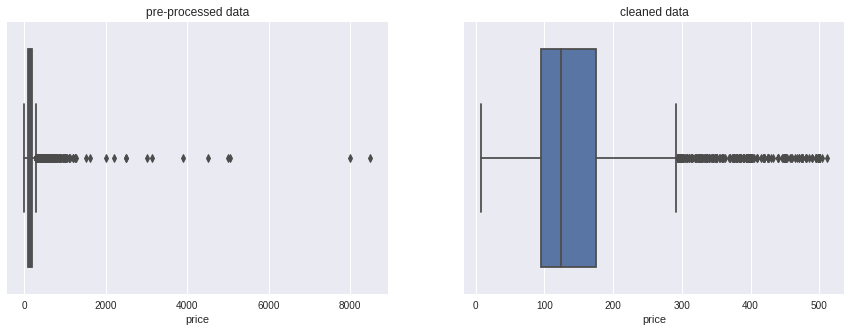

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['price'], ax=ax2)

plt.show()

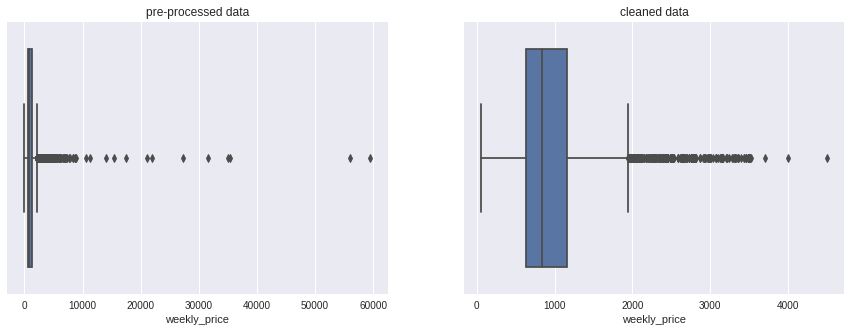

In [25]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['weekly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['weekly_price'], ax=ax2)

plt.show()

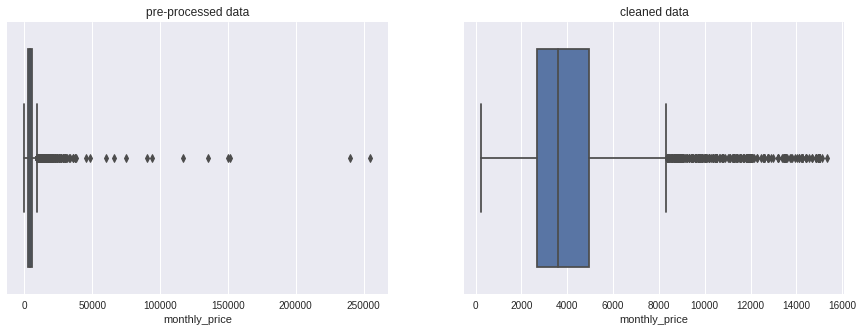

In [26]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['monthly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['monthly_price'], ax=ax2)

plt.show()

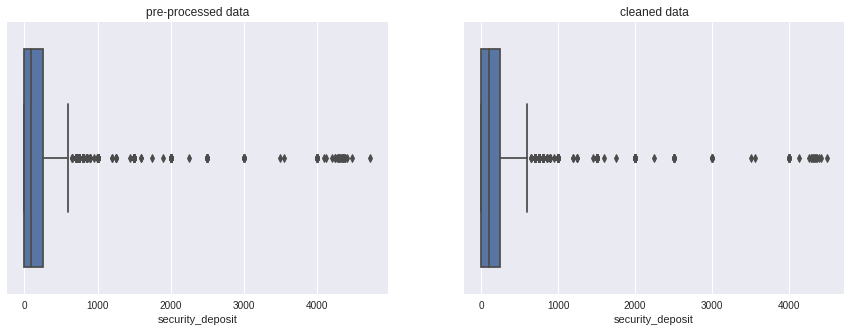

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['security_deposit'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['security_deposit'], ax=ax2)

plt.show()

## Room and property type frequency (min-max normalisation)

In [28]:
df_mod.room_type.value_counts(normalize=True)

Entire home/apt    0.792552
Private room       0.204249
Shared room        0.003199
Name: room_type, dtype: float64

In [29]:
df_mod.property_type.value_counts(normalize=True)

Apartment                 0.782110
House                     0.071886
Townhouse                 0.031929
Bed and breakfast         0.023720
Loft                      0.020039
Boat                      0.019254
Condominium               0.017141
Houseboat                 0.011649
Guest suite               0.008691
Serviced apartment        0.002656
Guesthouse                0.002294
Other                     0.002173
Villa                     0.001569
Boutique hotel            0.001449
Cabin                     0.000664
Cottage                   0.000604
Bungalow                  0.000604
Tiny house                0.000302
Hotel                     0.000241
Barn                      0.000241
Hostel                    0.000181
Chalet                    0.000181
Casa particular (Cuba)    0.000181
Earth house               0.000060
Nature lodge              0.000060
Campsite                  0.000060
Castle                    0.000060
Name: property_type, dtype: float64

## Correlation matrix

<AxesSubplot:>

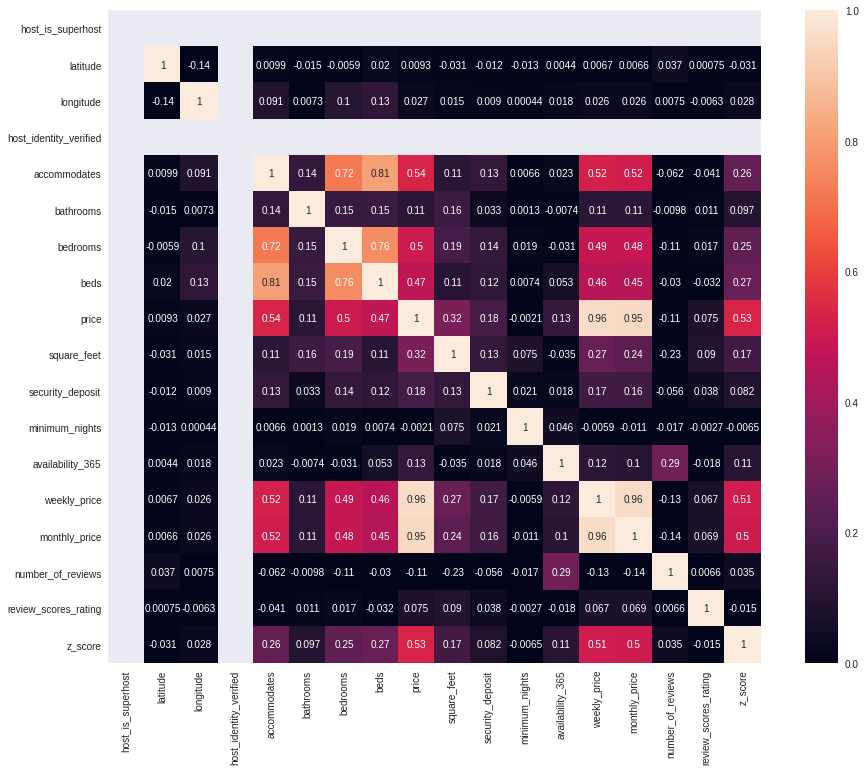

In [30]:
#correlation matrix
corrmat = df_mod.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, vmin=0, vmax=1, annot=True)

## Scatter plot and histogram
(plotted variables against each other)

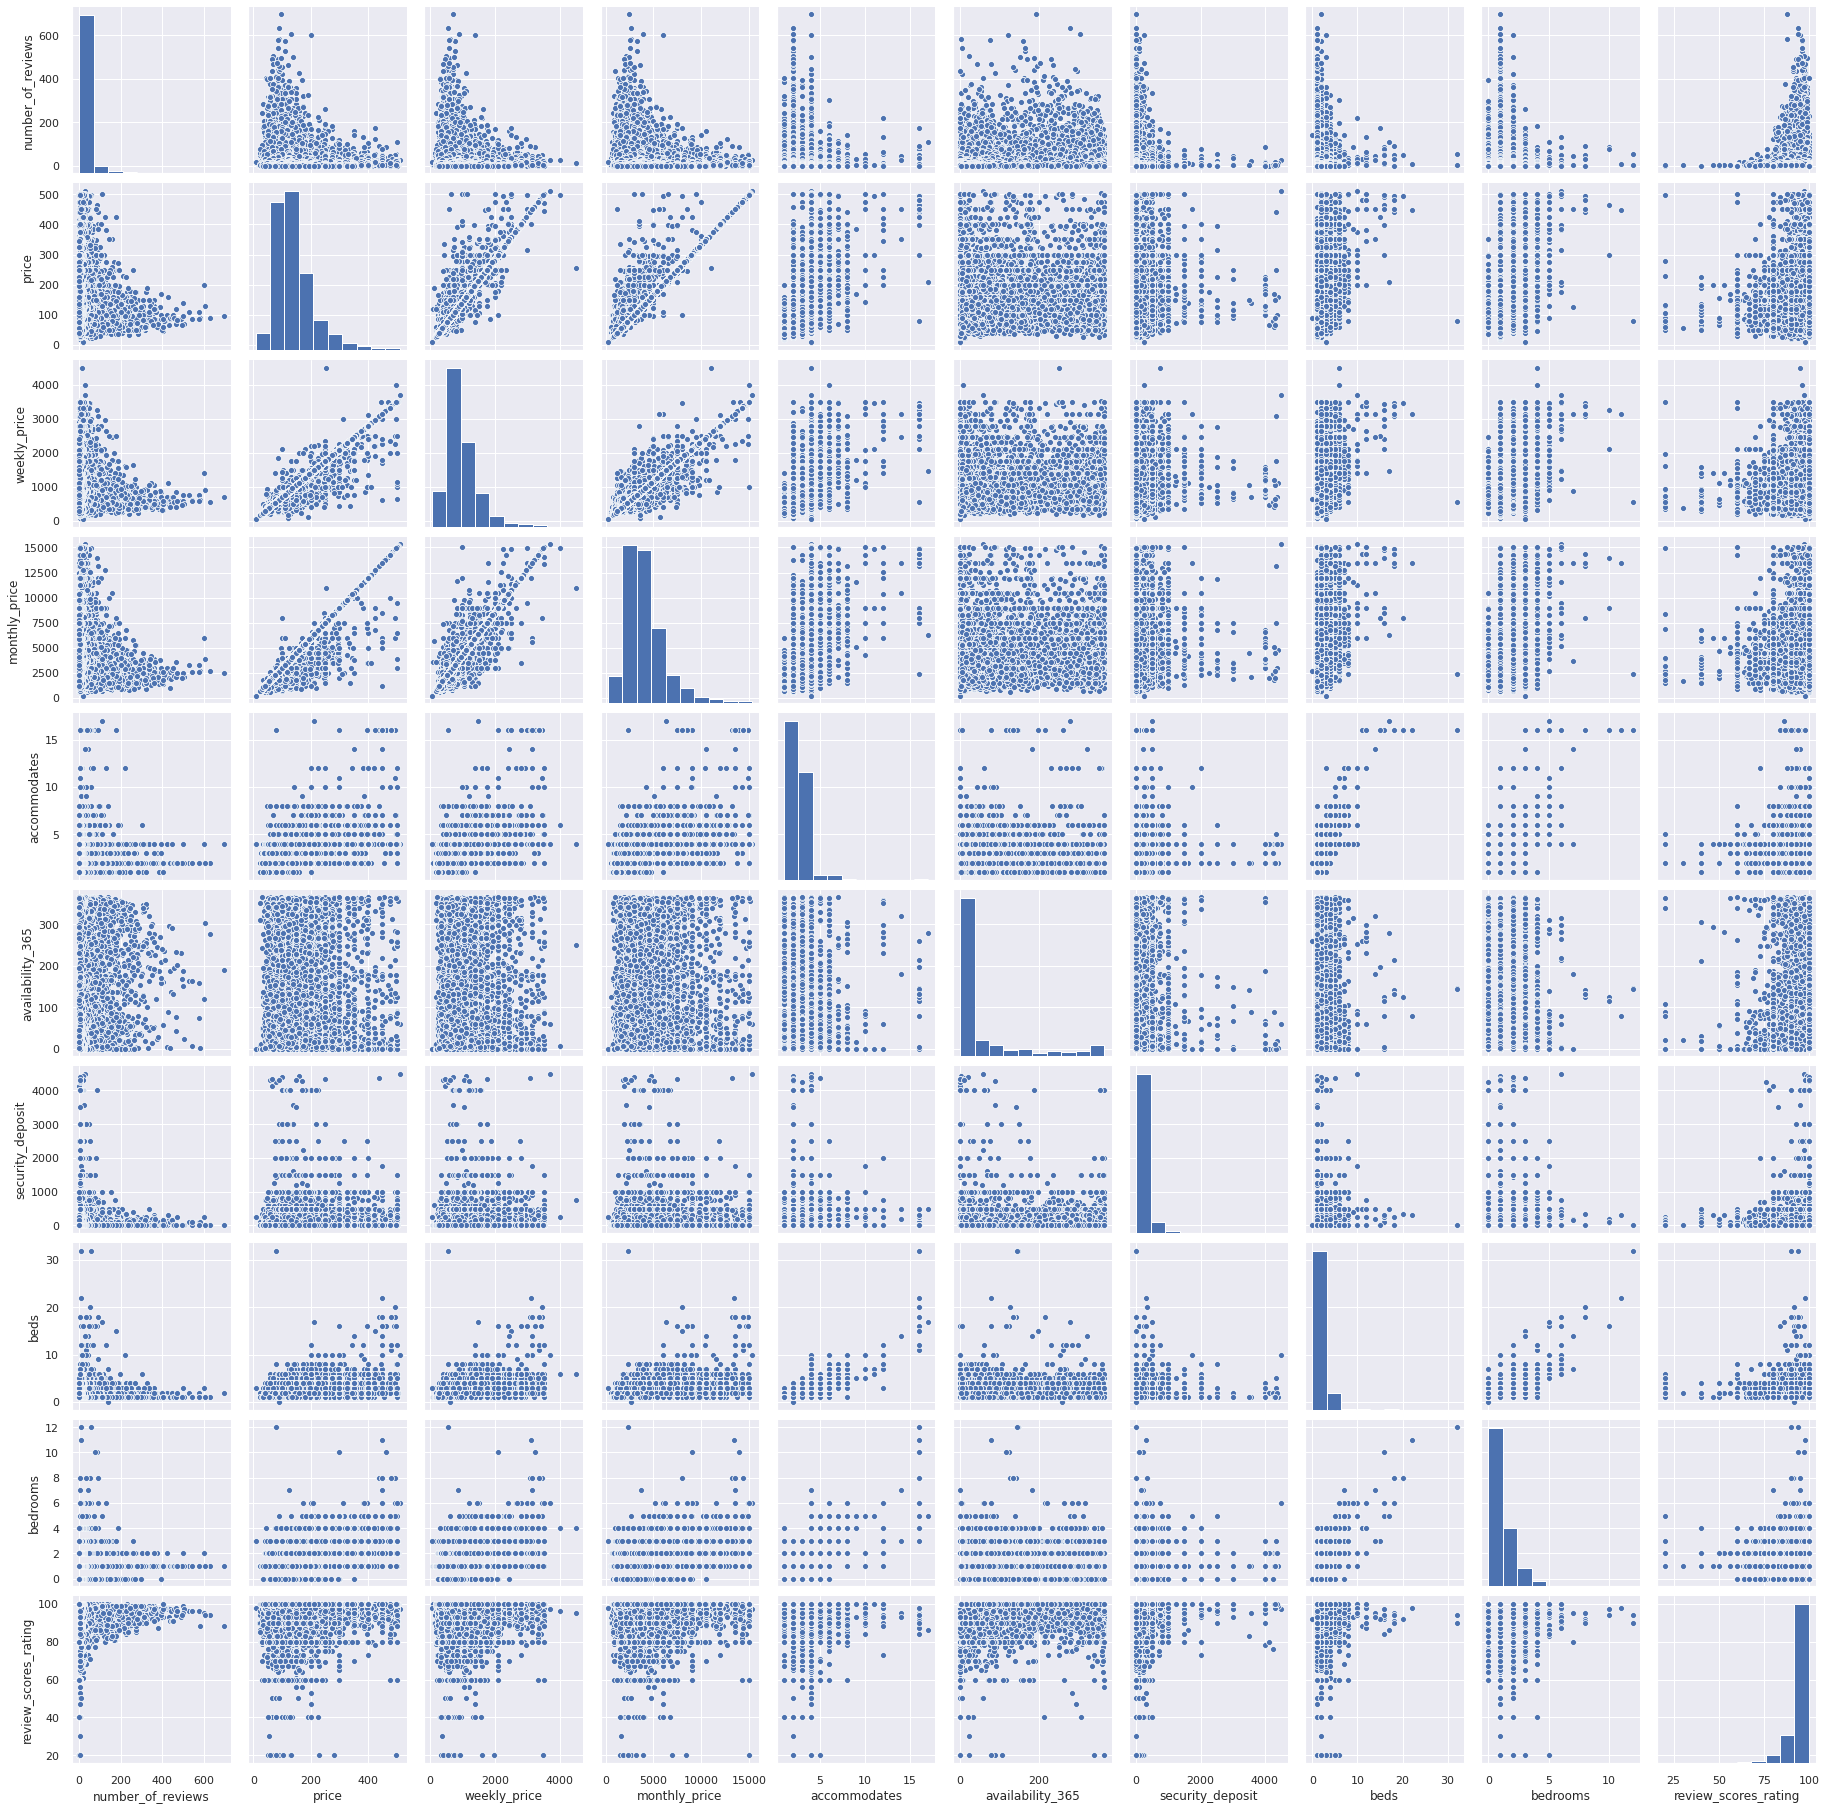

In [31]:
sns.set()
cols=['number_of_reviews', 'price', 'weekly_price', 'monthly_price', 
     'accommodates','room_type','availability_365','security_deposit', 
      'beds', 'bedrooms', 'review_scores_rating']
sns.pairplot(df_mod[cols])
plt.show()

## Another dataframe for spatial visualisation

In [32]:
git_url = "https://raw.githubusercontent.com/jungheeyang/3802ICT-Assignment-1/master/listings_details.csv"
columns_to_keep_map = ['id', 'host_is_superhost', 'description', 'latitude', 'longitude', 'host_identity_verified',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'price', 'amenities', 'square_feet', 'security_deposit', 
                   'minimum_nights', 'instant_bookable', 'availability_365', 'weekly_price', 
                   'monthly_price', 'zipcode','number_of_reviews', 'review_scores_rating', 
                    'neighbourhood_cleansed']
df_c = df[columns_to_keep_map].set_index('id')

In [33]:
df_c.columns

Index(['host_is_superhost', 'description', 'latitude', 'longitude',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'amenities', 'square_feet',
       'security_deposit', 'minimum_nights', 'instant_bookable',
       'availability_365', 'weekly_price', 'monthly_price', 'zipcode',
       'number_of_reviews', 'review_scores_rating', 'neighbourhood_cleansed'],
      dtype='object')

In [34]:
def dollar_to_float(df):
    df = df.replace('[\$,]', '', regex=True).astype(float)
    return df


def obj_to_bool(df):
    df = df.replace('f', 'FALSE', regex=True).astype(bool)
    df = df.replace('t', 'TRUE', regex=True).astype(bool)
    return df


def percent_to_float(df):
    df = df.replace('%', '', regex=True).astype(float)
    return df


df_c.price = dollar_to_float(df_c.price)
df_c.security_deposit = dollar_to_float(df_c.security_deposit)
df_c.weekly_price = dollar_to_float(df_c.weekly_price)
df_c.monthly_price = dollar_to_float(df_c.monthly_price)
df_c.security_deposit = dollar_to_float(df_c.security_deposit)

df_c.host_is_superhost = obj_to_bool(df_c.host_is_superhost)
df_c.host_identity_verified = obj_to_bool(df_c.host_identity_verified)


In [35]:
df_c['security_deposit'].fillna(0, inplace=True)


#Standard weekly price is 7*price

df_c['weekly_price'].fillna(df_c['price']*7, inplace=True)

#Standard monthly price is 30*price

df_c['monthly_price'].fillna(df_c['price']*30, inplace=True)

df_c = df_c.loc[df_c['price'] > 0]
df_c.dropna(subset=['beds', 'bedrooms', 'bathrooms', 'zipcode', 'review_scores_rating'], inplace=True)

In [36]:
df_c.isna().sum()

host_is_superhost             0
description                  69
latitude                      0
longitude                     0
host_identity_verified        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     0
bedrooms                      0
beds                          0
price                         0
amenities                     0
square_feet               16317
security_deposit              0
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price                  0
monthly_price                 0
zipcode                       0
number_of_reviews             0
review_scores_rating          0
neighbourhood_cleansed        0
dtype: int64

In [37]:
df_c.to_csv('listings_details_updated_association(neighbourhood).csv')

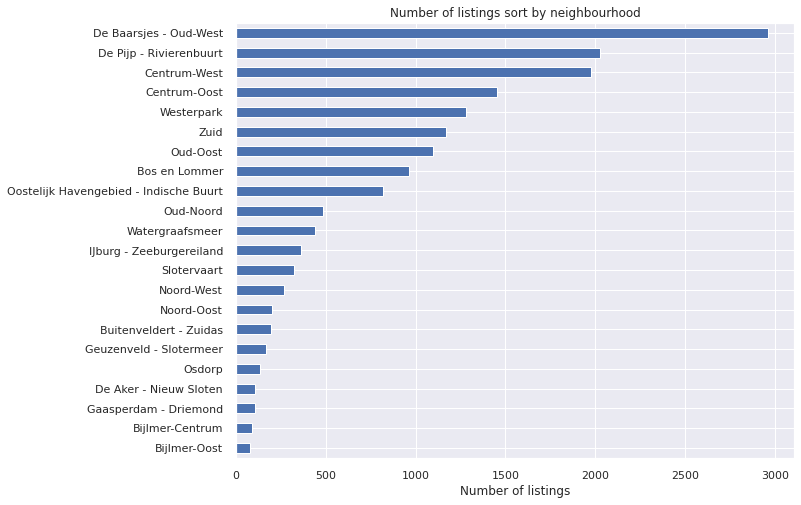

Bijlmer-Oost               79
Bijlmer-Centrum            88
Gaasperdam - Driemond     106
De Aker - Nieuw Sloten    107
Osdorp                    132
Name: neighbourhood_cleansed, dtype: int64

In [38]:
freq_n = df_c['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
freq_n.plot.barh(figsize=(10, 8), color='b')
plt.title("Number of listings sort by neighbourhood")
plt.xlabel('Number of listings', fontsize=12)
plt.show()
freq_n.head()

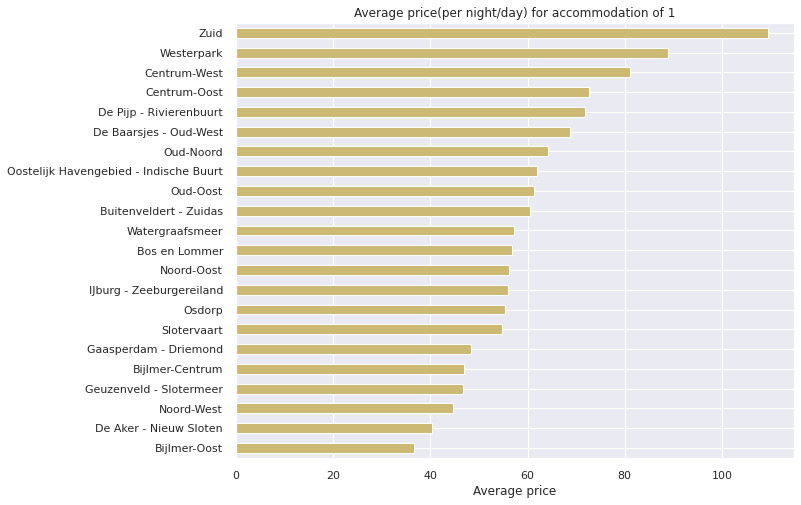

In [39]:
freq_p = df_c[df_c['accommodates']==1]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='y')
plt.title("Average price(per night/day) for accommodation of 1")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

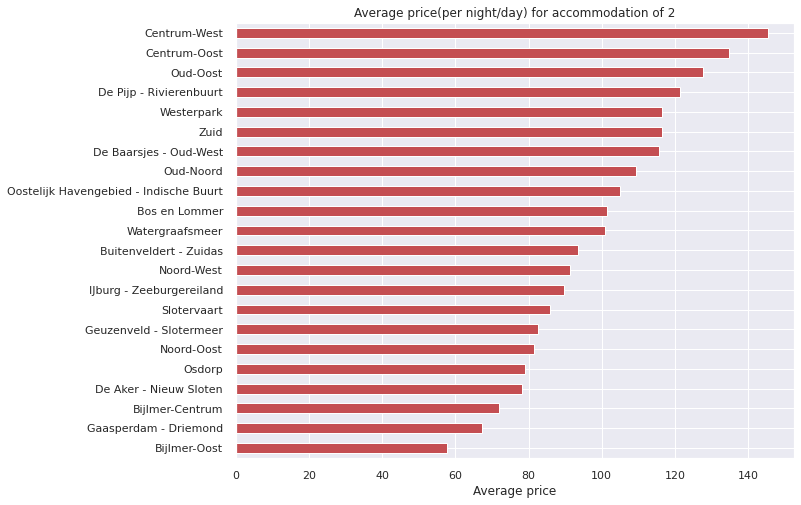

In [40]:
freq_p = df_c[df_c['accommodates']==2]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='r')
plt.title("Average price(per night/day) for accommodation of 2")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

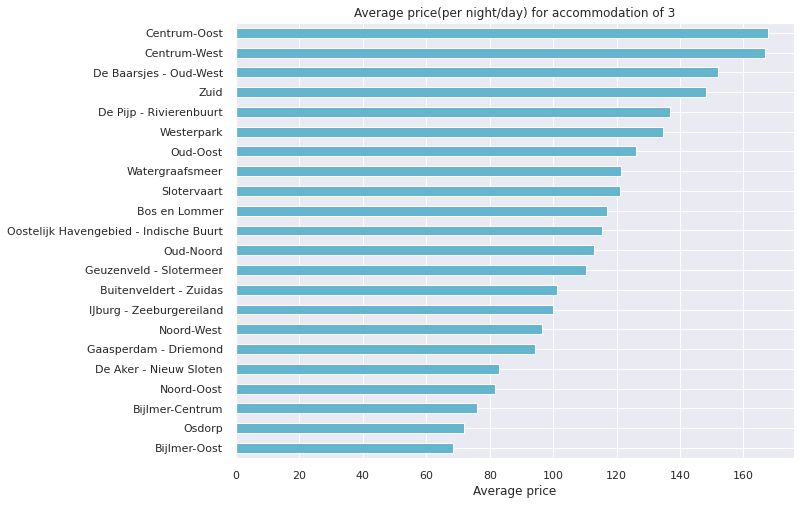

In [41]:
freq_p = df_c[df_c['accommodates']==3]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='c')
plt.title("Average price(per night/day) for accommodation of 3")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

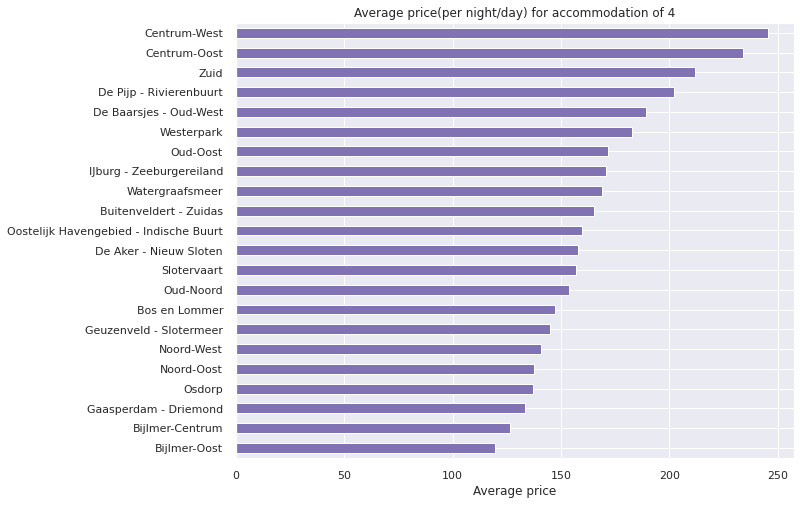

In [42]:
freq_p = df_c[df_c['accommodates']==4]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='m')
plt.title("Average price(per night/day) for accommodation of 4")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

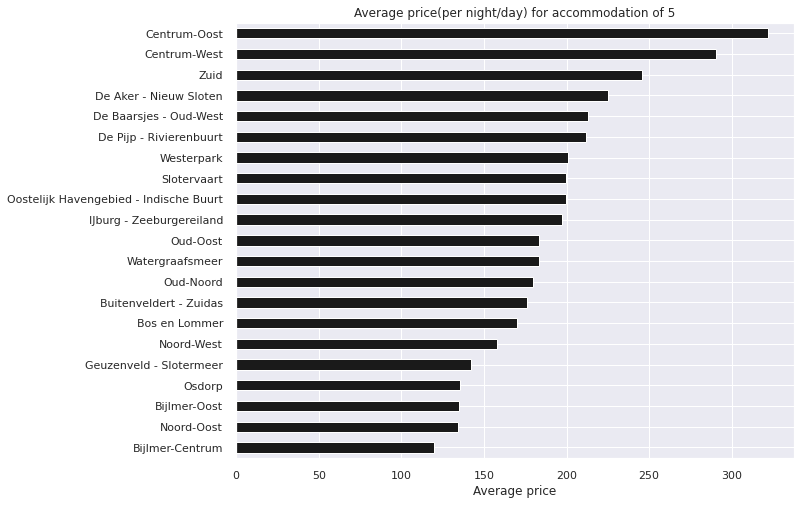

In [43]:
freq_p = df_c[df_c['accommodates']==5]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='k')
plt.title("Average price(per night/day) for accommodation of 5")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

## Heatmap of airbnb listings

In [52]:
#heatmap of airbnb listings
map = folium.Map(location=[52.3680, 4.9036], zoom_start = 11.7)

HeatMap(df_c[['latitude','longitude']].dropna(),
              radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)

map

<Figure size 720x576 with 0 Axes>

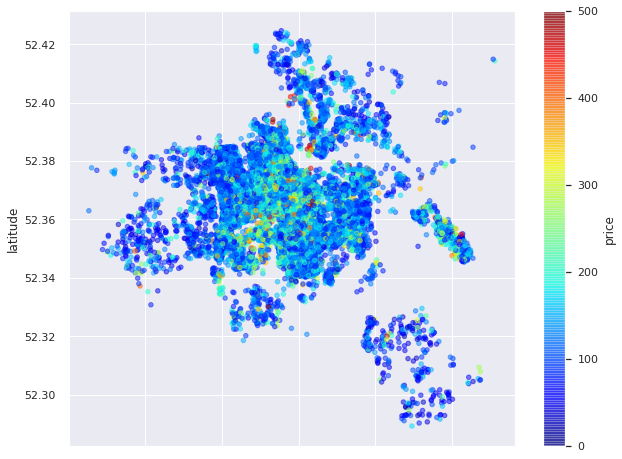

In [45]:
plt.figure(figsize=(10,8))
map_price=df_mod[df_mod.price<500]
im = map_price.plot(kind='scatter', x='longitude',y='latitude',c='price',
                 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5,figsize=(10,8), vmin=0, vmax=500);
plt.ioff()

In [46]:
df_mod['description'].fillna("n/a", inplace=True)

#remove numbers
df_mod['description']= df_mod['description'].str.replace('\d+', '')

#to lowercase
df_mod['description']= df_mod['description'].str.lower()

#remove window new line
df_mod['description']= df_mod['description'].str.replace('\r\n', "")

#remove stopwords
stop_english = stopwords.words("english")
df_mod['description'] = df_mod['description'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
df_mod['description'] = df_mod['description'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
df_mod['description'] = df_mod['description'].str.replace('\s+', ' ')

In [47]:
texts = df_mod['description'].tolist()
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(word_freq, columns=['words', 'counts']).sort_values(
    by="counts", ascending=False)
cvec_df.head(15)

,words,counts
3,apartment,29510
34,amsterdam,24068
181,room,15986
113,kitchen,14544
87,city,12843
55,house,12609
180,living,10952
43,bedroom,10535
99,bathroom,10524
88,located,9940


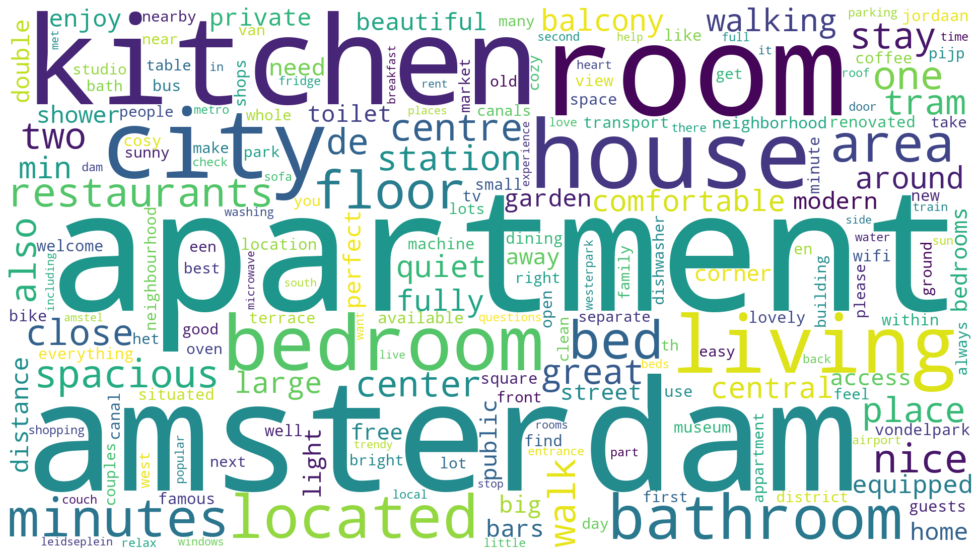

In [48]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(background_color='white', width=1920,height=1080)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('neighbourhood.png')
plt.show()

In [49]:
cvec_df.to_csv('keywords.csv', index=False)